# 5c Data Mining

<div class="alert alert-info"> Unter <strong>Data Mining</strong> wird allgemein das systematische <strong>Ent-</strong> bzw. <strong>Aufdecken</strong> von Strukturen und Mustern in (großen) Datensätzen mithilfe statistischer Verfahren verstanden. Nachdem wir uns im ersten Teilkapitel die Grundlagen und die Datenorganisation angesehen haben, setzen wir uns danach besonders mit den beiden Bibliotheken <strong>scikit-learn</strong> und <strong>statsmodels</strong> auseinander. Wir lernen dabei lineare Modelle (lineare, logistische, ridge und lasso Regressionen) kennen, sehen uns Entscheidungsbäume (Regressionsbaum, Klassifikationsbaum, Random Forest). Danach sehen wir uns kurz den Aufbau von Neuronalen Netzen an und implementiere diese mit <strong>scikit-learn</strong> und mit <strong>keras</strong>. Das Kapitel 5c ist dabei aufgebaut wie folgt: 
    <ol>
        <li>Grundlagen und Datenorganisation</li>
        <li>Lineare Modelle</li>
        <li>Entscheidungsbäume</li>
        <li>Exkurs: Neuronale Netze</li>
        <li>Exkurs: Modellauswahl</li>
    </ol>

Nach dieser Lerneinheit können Sie den Unterschied zwischen Regressionen und Klassifikationen nennen. Sie können einen Datensatz in einen Trainings- und Testdatensatz einteilen. Sie können mithilfe der **scikit-learn**-Bibliothek die besprochenen Gütekriterien berechnen. Außerdem können Sie die behandelten Verfahren mithilfe der verwendeten Bibliotheken implementieren und deren Ergebnisse interpretieren. <br>

Pakete, die noch installiert werden müssen: 
* matplotlib
* scikit-learn
* statsmodels
* tensorflow

## 1 Grundlagen und Datenorganisation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import datasets

### 1.1 Basics

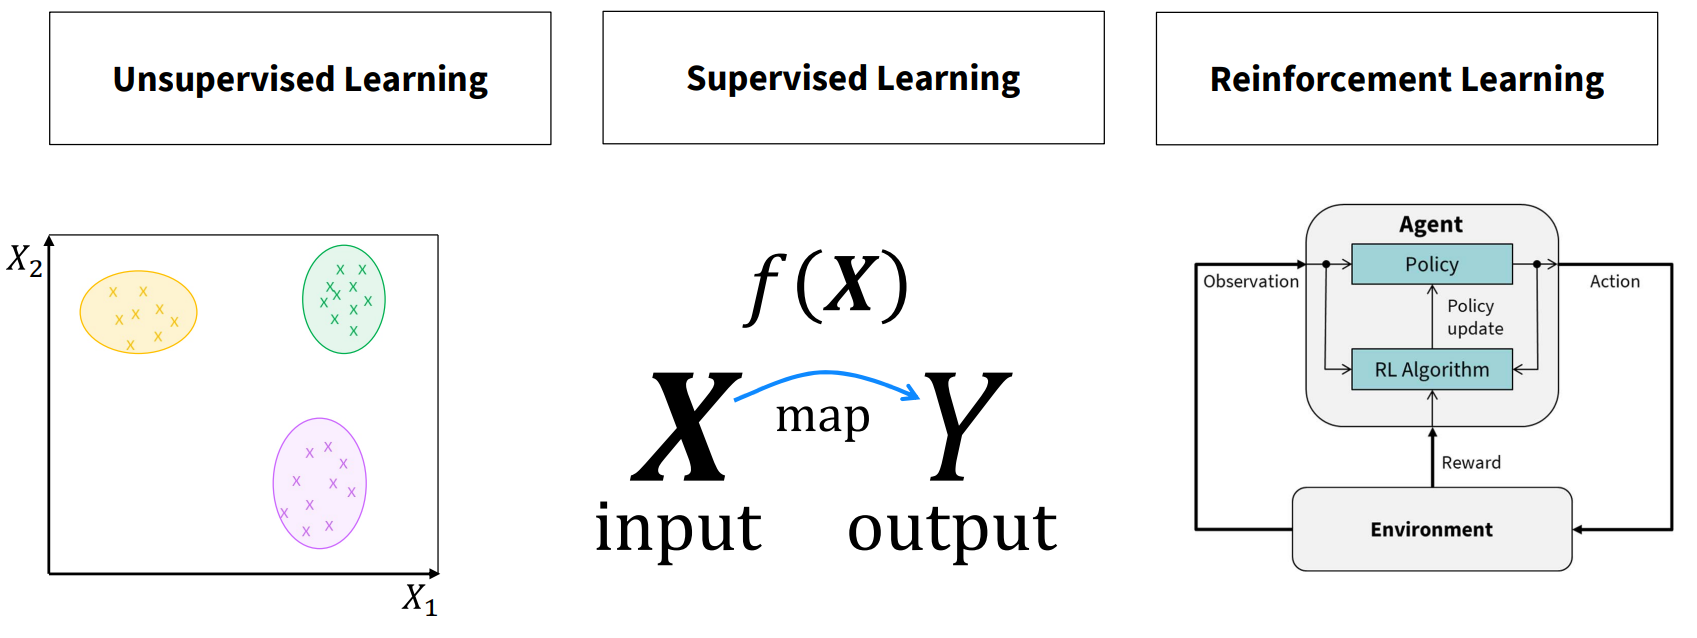

### 1.2 Supervised Learning
* Ziel: Schätzen der funktionalen Beziehung *f(**X**)* zwischen den Features ***X***$ = (X_1, X_2, \dots, X_m)$ und der Zielvariable <span style="color:turquoise">*Y*</span>
* Bei Prognosen können wir ***X***, aber nicht *Y* beobachten.
* Unser Datensatz beinhalten sowohl die Features als auch die Zielvariable:
    * Ist die Zielvariable **diskret** $\rightarrow$ Klassifikation
    * Ist die Zielvariable **numerisch/metrisch** $\rightarrow$ Regression

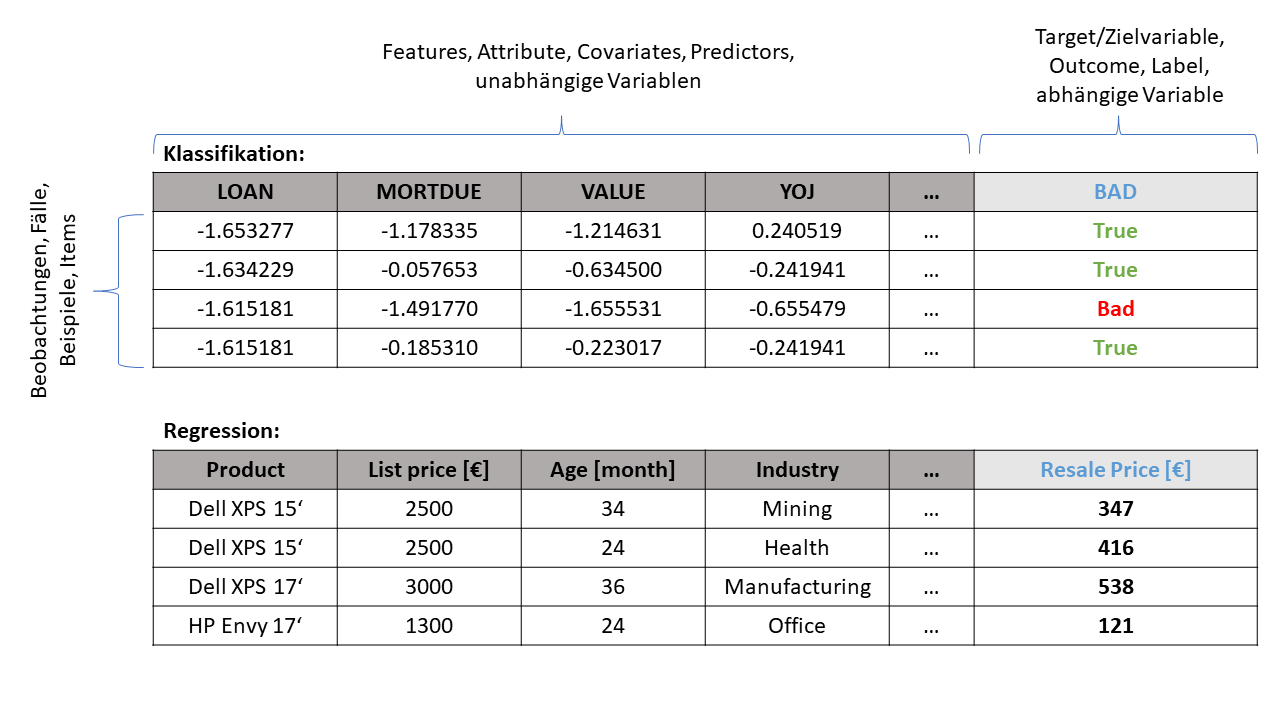

### 1.3 Performancemessung

**Wie können wir feststellen, ob unser Modell ein 'gutes' Modell ist?**

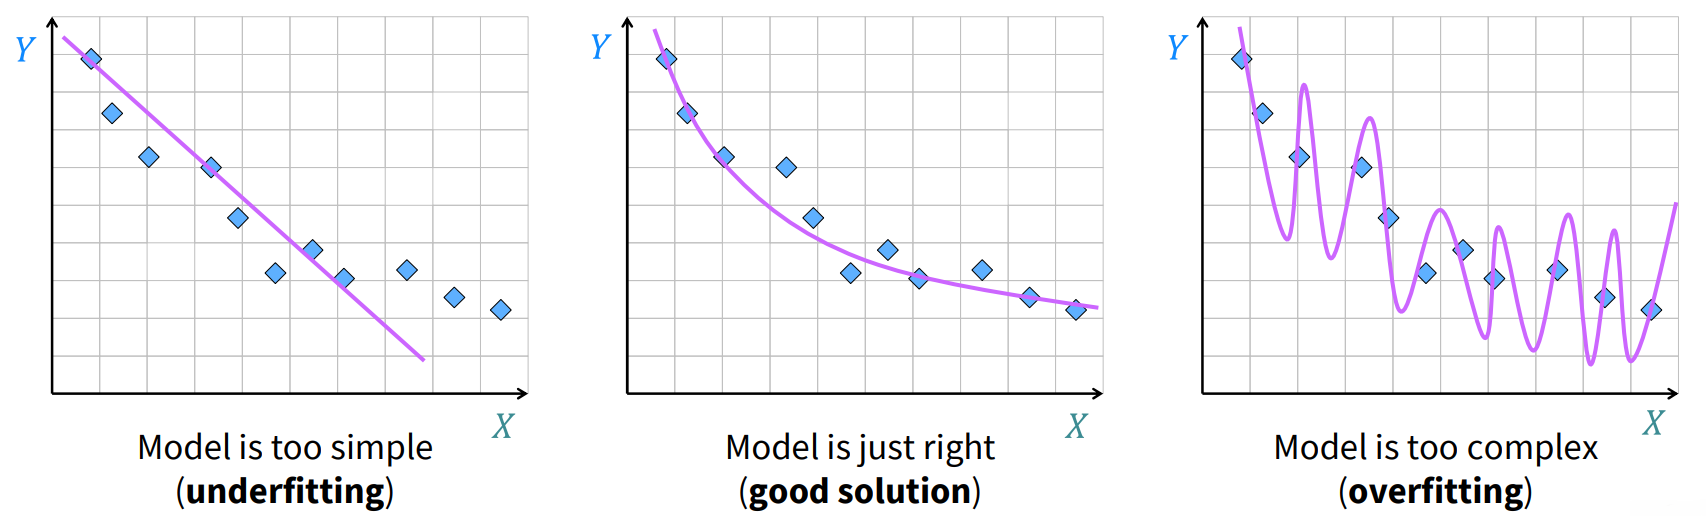

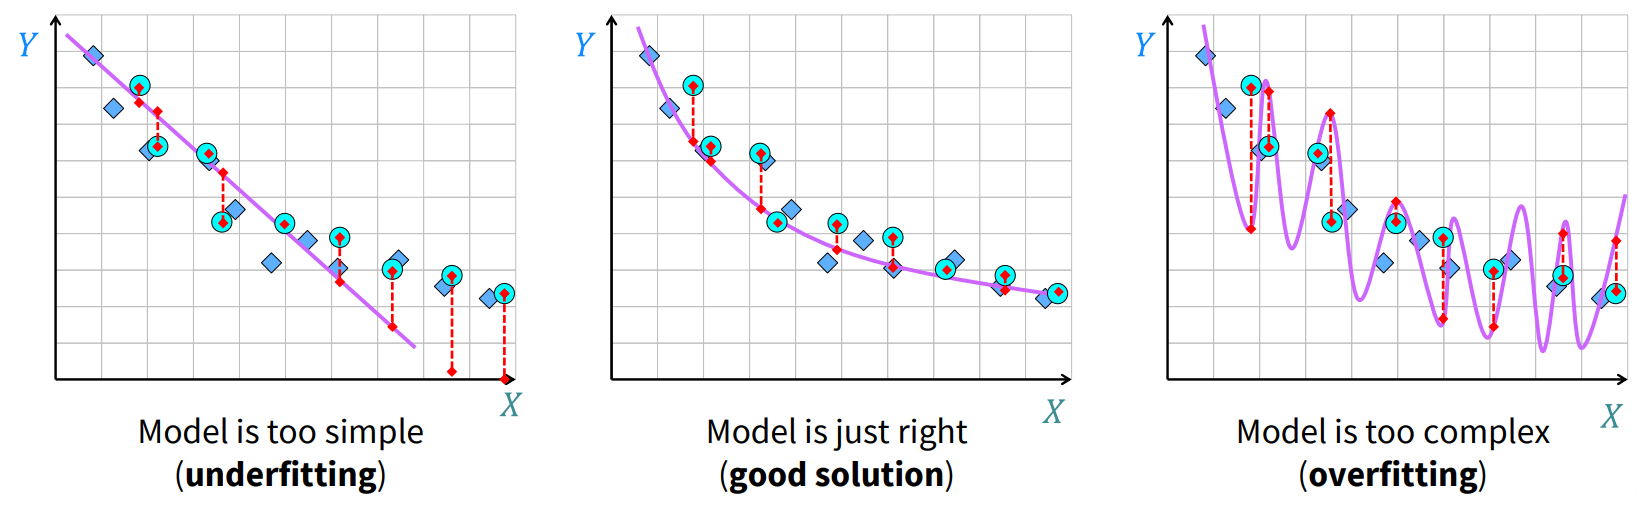

### 1.4 Gütekriterien für Regressionen

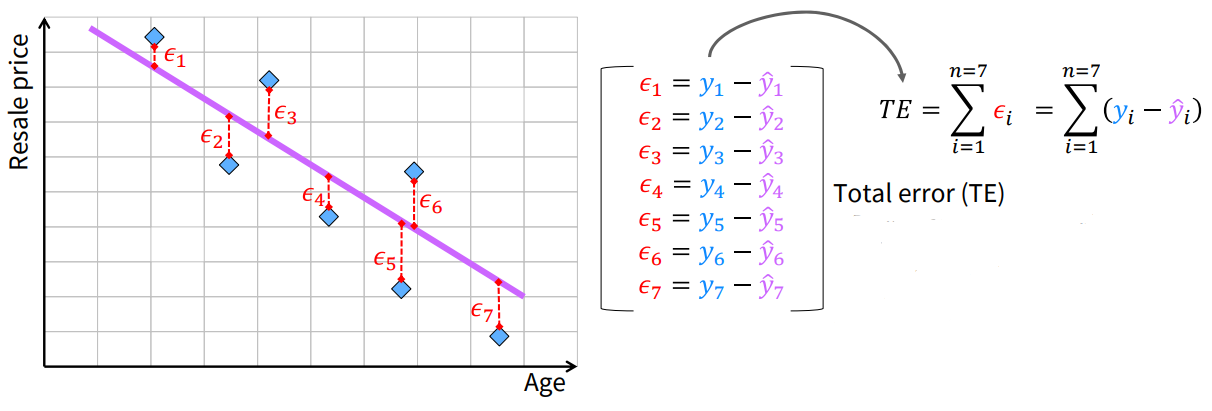

**Squared Error Measures**
* Squared Error: $SE = \sum_{i = 1}^{n = 7}(y_i - \hat{y}_i)^2$
* Mean squared-error: $MSE = \frac{1}{n}\sum_{i = 1}^{n = 7}(y_i - \hat{y}_i)^2$
* Root-mean squared-error: $RMSE = \sqrt{MSE}$

**Absolute Error Measures**
* Absolute error: $AE = \sum_{i = 1}^{n}|y_i - \hat{y}_i|$
* Mean absolute error: $MAE = \frac{1}{n}\sum_{i = 1}^{n}|y_i - \hat{y}_i|$

**Percentage Error Measures**
* Mean percentage error: $MPE = \frac{100%}{n}\sum_{i = 1}^{n}\frac{y_i - \hat{y}_i}{y_i}$
* Mean absolute percentage error: $MAPE = \frac{100%}{n}\sum_{i = 1}^{n}|\frac{y_i - \hat{y}_i}{y_i}|$
* Symmetric Mean absolute percentage error: $sMAPE = \frac{100%}{n}\sum_{i = 1}^{n}\frac{|y_i - \hat{y}_i|}{|y_i|+|\hat{y}_i|}$

<div class="alert alert-info">Diese und weitere Metriken finden Sie im Paket <b>sklearn.metrics</b>!

In [ ]:
from sklearn import metrics
help(metrics)

### 1.5 Gütekriterien für Klassifikationen

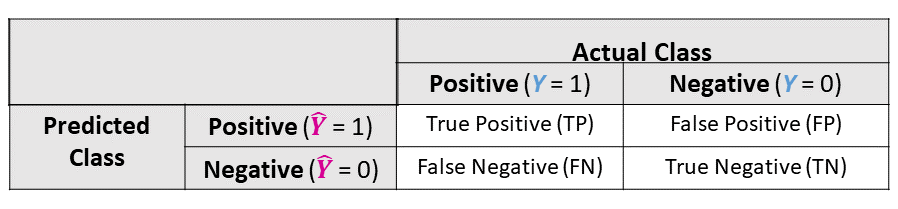

* Accuracy: $\frac{TP + TN}{TP + TN + FP + FN}$

* Classification Error: $\frac{FP + FN}{TP + TN + FP + FN}$

* Specificity: $\frac{TN}{TN + FP}$

* Sensitivity / Recall: $\frac{TP}{TP + FN}$

* Precision: $\frac{TP}{TP + FP}$


**Achtung**: Die Confusion Matrix ist eine Funktion des Klassifikations-Cut-Offs. Um eine diskrete Vorhersage zu bekommen, vergleichen wir unsere vorhergesagte Wahrscheinlichkeit $\hat{p}(Y = 1|X)$ mit einem **cut-off** $\tau$:\
\
\begin{align}
\hat{Y} = \left\{
\begin{array}{cl}
1 & \textrm{wenn } \hat{p}(Y = 1|X) > \tau, \\
0 & \textrm{sonst}.
\end{array}
\right.
\end{align}

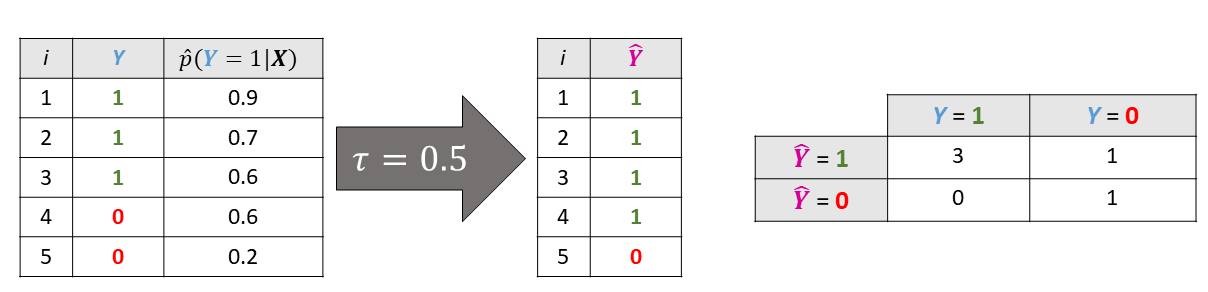

#### Receiver Operating Characteristic (ROC) Curve
* Generalisierung der Confusion matrix: stellt Klassifikationsperformance über alle cut-offs dar

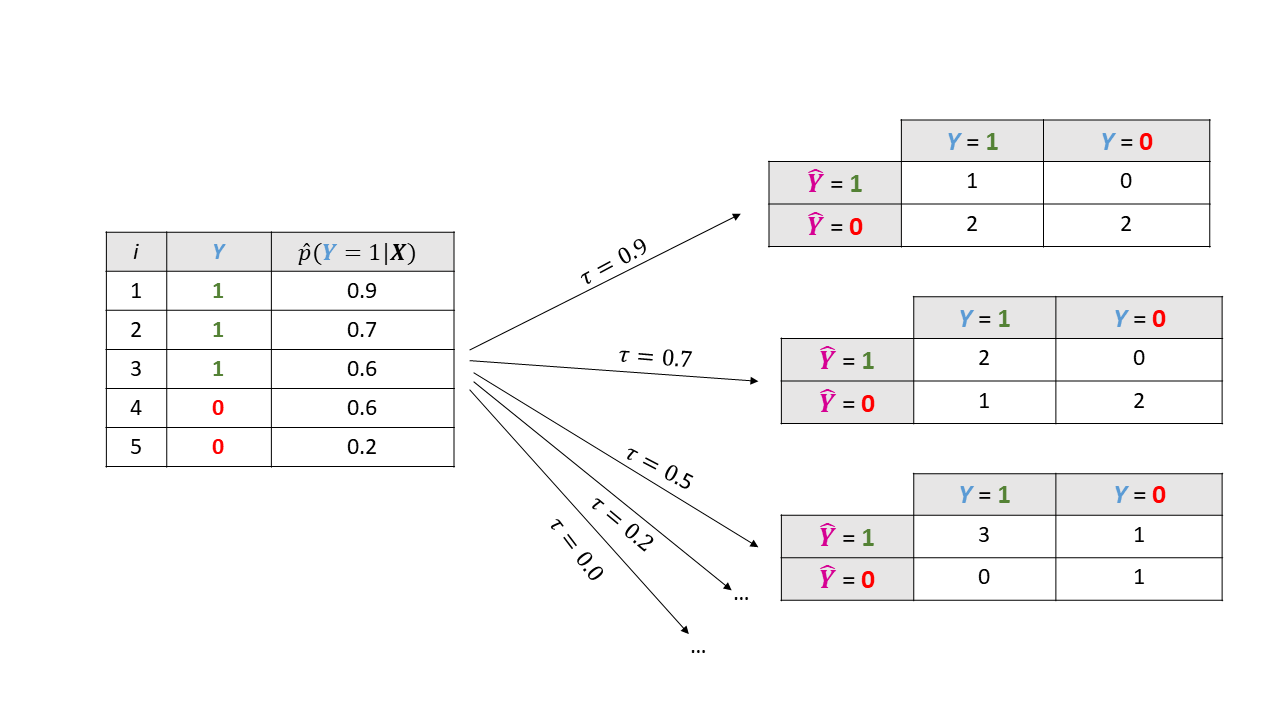

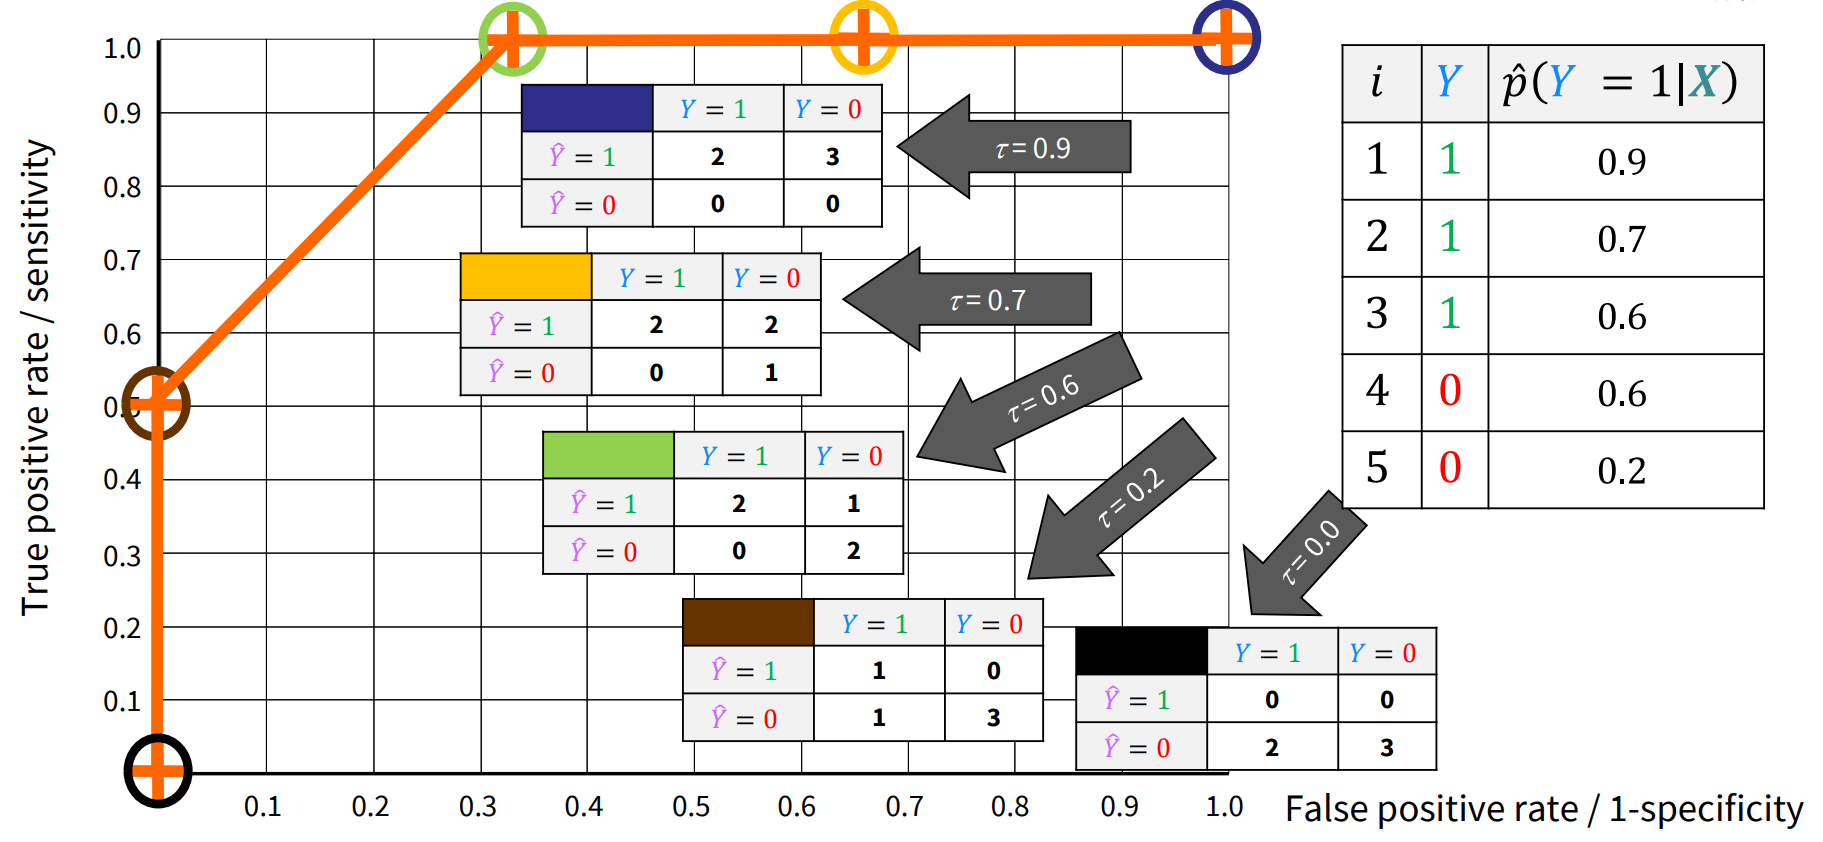

#### Area Under the ROC Curve (AUC)
* Sinnvoll um sich überschneidende ROC Kurven zu vergleichen
* Gute Performance: AUC deutlich über 0.5 --> je höher, desto besser

<div class="alert alert-info">Diese und weitere Metriken finden Sie im Paket <b>sklearn.metrics</b>!

### 1.6 Datenorganisation

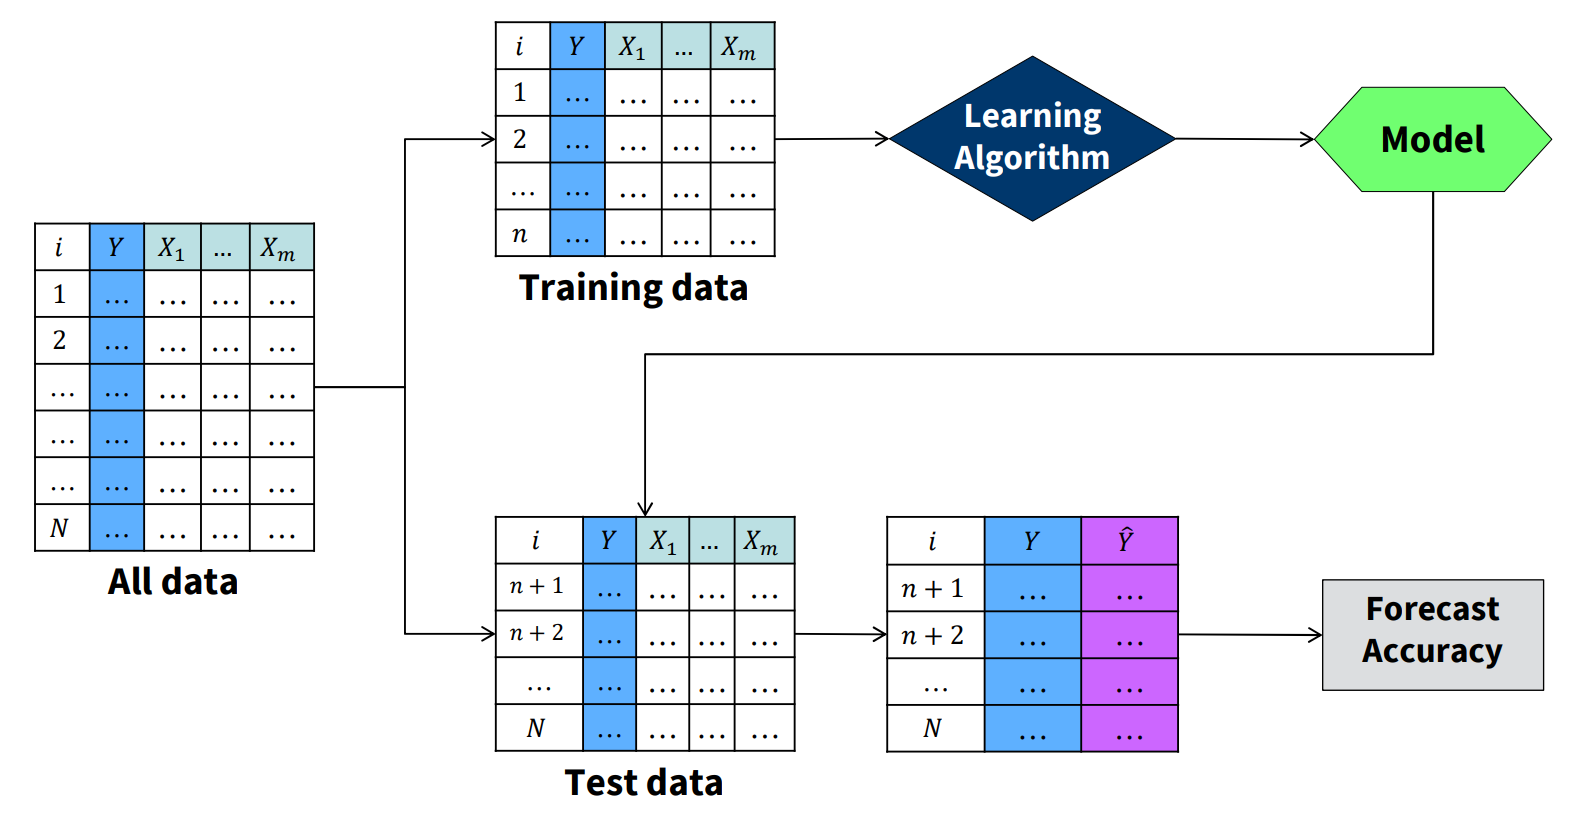

#### Train-Test-Datensatz
* Simuliert 'real-world application'
* Verfahren ist datenintensiv
* Risiko für unbalancierte Daten
* Alternativen: cross-validation

In [ ]:
# Erstellen eines synthetischen Datensatzes mit zwei Features und 1000 Beobachtungen
from sklearn.datasets import make_regression
X_reg, Y_reg = make_regression(n_samples=1000, n_features=2, noise=10, random_state=1234)

In [ ]:
print(X_reg)
print("---------------------")
print("Anzahl an Beobachtungen:", X_reg.shape[0])
print("Anzahl an Features:", X_reg.shape[1])

In [ ]:
print(Y_reg)
print("---------------------")
print("Anzahl an Beobachtungen:", Y_reg.shape[0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, Y_reg, test_size=0.33, random_state=42)
print("Anzahl an Beobachtungen im Trainingsdatensatz:", X_train_r.shape[0])
print("Anzahl an Beobachtungen im Testdatensatz:", X_test_r.shape[0])

In [ ]:
# Erstellen eines synthetischen Datensatzes mit zwei Klassen 
from sklearn.datasets import make_blobs

mu = np.array([[0,0], [2, 2]])  # mean vector per cluster
std = np.array([[1, 1], [0.5, 0.5]])  # covariance matrix per cluster

X_c, Y_c = make_blobs(n_samples=1000, n_features=2, centers=mu, cluster_std=[[1, 1], [0.5,0.5]])

In [ ]:
print(X_c[0:5, 0:5])
print("--------------")
print("Anzahl an Beobachtungen:", X_c.shape[0])
print("Anzahl an Features:", X_c.shape[1])

In [ ]:
print(Y_c[0:5]) # binäre mit 0 und 1
print("--------------")
print("Anzahl an Beobachtungen:", Y_c.shape[0])

In [ ]:
# Plotten des Datensatzes
plt.scatter(X_c[:,0], X_c[:, 1], c=Y_c)
plt.show()

In [ ]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, Y_c, test_size=0.33, 
                                                            random_state=42)
print("Anzahl an Beobachtungen im Trainingsdatensatz:", X_train_c.shape[0])
print("Anzahl an Beobachtungen im Testdatensatz:", X_test_c.shape[0])

In [ ]:
def class_ratio(y):
    return np.sum(y)/y.shape[0]

print("Class ratio im Originaldatensatz: ", class_ratio(Y_c))
print("Class ratio im Trainingsdatensatz: ", class_ratio(y_train_c))
print("Class ratio im Testdatensatz: ", class_ratio(y_test_c))

In [ ]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, Y_c, test_size=0.33, 
                                                            random_state=42, stratify=Y_c)
print("Anzahl an Beobachtungen im Trainingsdatensatz:", X_train_c.shape[0])
print("Anzahl an Beobachtungen im Testdatensatz:", X_test_c.shape[0])

print("Class ratio im Originaldatensatz: ", class_ratio(Y_c))
print("Class ratio im Trainingsdatensatz: ", class_ratio(y_train_c))
print("Class ratio im Testdatensatz: ", class_ratio(y_test_c))

## 2 Lineare Modelle

### 2.1 Lineare Regression

* Vermutet eine lineare, additive Beziehung zwischen den Features und der **metrischen** Zielvariable
* Regressionsgleichung: <span style="color:turquoise">*Y*</span> $= \beta_0 + \beta_1 \cdot X_1 + \dots + \epsilon$ mit *Y*-Achsenabschnitt $\beta_0$, Steigungsparametern $\beta_1, \cdots$ und den Residuen $\epsilon$.
* Ziel: $\beta$ und $\epsilon$ optimieren, indem wir unsere *cost function* minimieren: \
$\sum_{i=1}^N (y_i - \hat{y}_i)^2$
* Schätzen der Regressionsparameter $\beta_0, \dots$ mithilfe der Kleinsten-Quadrate-Methode

**Hinweis**: Für mehr Informationen zum Schätzen einer linearen Regression und zu deren Annahmen, siehe Vorlesungsskript Statistik II. 

**Lineare Regression**
1. Modellspezifikaton, hier: <span style="color:turquoise">*Y*</span> $ = \beta_0 + \beta_1 \cdot X_1 + \beta_2 \cdot X_2+ \epsilon$
2. Trainieren des Modells, hier mithilfe von OLS
3. Ergebnisse ausgeben lassen

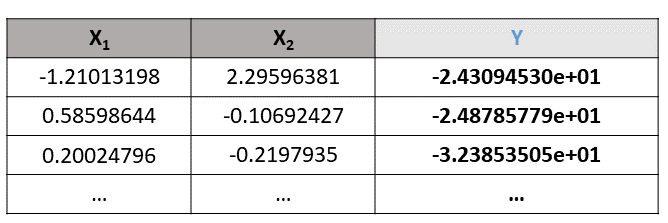

In [ ]:
# Plotten der feature-to-target Beziehungen für jede der beiden Features
for i in np.arange(X_reg.shape[1]):
    plt.figure()
    plt.scatter(X_reg[:,i], Y_reg)
    plt.title("Bivariate plot of $X_{}$ vs. Y".format(i+1))
    plt.ylabel("Y")
    plt.xlabel("$X_{}$".format(i+1))
    plt.show()

**a) Statsmodels**

In [ ]:
# 1. Modellspezifikation
X_train_ = sm.add_constant(X_train_r)  # wir fügen eine Konstante hinzu (Intercept) --> Y = ß0 * X0 + ß1 * X1 + ...
X_test_ = sm.add_constant(X_test_r)
print(X_train_)

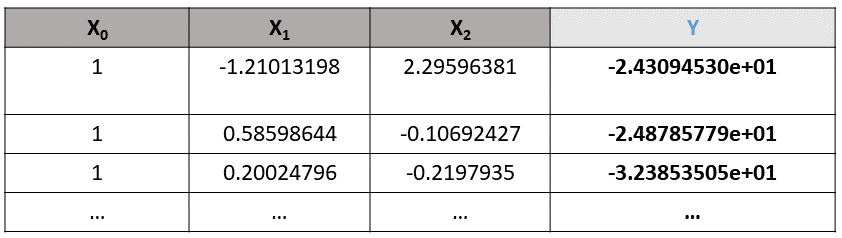

In [ ]:
reg = sm.OLS(y_train_r, X_train_) # 1. Modellspezifikation
result = reg.fit() # 2. Trainieren des Modells
print(result.summary()) # 3. Ergebnisse ausgeben lassen 

In [ ]:
# 4. In-Sample (IS) und Out-Of-Sample Predictions (OS)
y_pred_IS = result.predict(X_train_) # IS
y_pred_OS = result.predict(X_test_) # OS

# Measures
print("In-Sample MSE: ", metrics.mean_squared_error(y_train_r, y_pred_IS))
print("Out-Of-Sample MSE: ", metrics.mean_squared_error(y_test_r, y_pred_OS))
print("==================================================")
print("In-Sample MAE: ", metrics.mean_absolute_error(y_train_r, y_pred_IS))
print("Out-Of-Sample MAE: ", metrics.mean_absolute_error(y_test_r, y_pred_OS))

**b) Scikit-learn**

In [ ]:
from sklearn import linear_model

In [ ]:
reg = linear_model.LinearRegression() # 1. Modellspezifikation
reg.fit(X = X_train_r, y = y_train_r) # 2. Trainieren des Modells
print("Intercept: ", reg.intercept_) # 3. Ergebnisse ausgeben lassen 
print("Koeffizienten: ", reg.coef_)

In [ ]:
# 4. IS OS Predictions
y_pred_IS = reg.predict(X_train_r) # IS
y_pred_OS = reg.predict(X_test_r) # OS

# Measures
print("In-Sample MSE: ", metrics.mean_squared_error(y_train_r, y_pred_IS))
print("Out-Of-Sample MSE: ", metrics.mean_squared_error(y_test_r, y_pred_OS))
print("==================================================")
print("In-Sample MAE: ", metrics.mean_absolute_error(y_train_r, y_pred_IS))
print("Out-Of-Sample MAE: ", metrics.mean_absolute_error(y_test_r, y_pred_OS))
print("==================================================")
print("R^2: ", metrics.r2_score(y_train_r, y_pred_IS))

### 2.2 Regression: Ridge und Lasso Regression

Um Overfitting zu vermeiden, gibt es in linearen Regressionsmodellsn zwei weit verbreitete Regularisierungstechniken, bei denen der *cost function* ein Strafterm hinzugefügt wird:
* **Ridge (L1)**: $\sum_{i=1}^N (y_i - \hat{y}_i)^2 + \alpha \sum_{j=0}^p \beta_j^2$

In [ ]:
# Ridge
reg = linear_model.Ridge(alpha=0.7) # 1. Modellspezifikation
reg.fit(X = X_train_, y = y_train_r) # 2. Trainieren des Modells
print("Intercept: ", reg.intercept_) # 3. Ergebnisse ausgeben lassen 
print("Koeffizienten: ", reg.coef_)
print("R^2: ", reg.score(X_train_, y_train_r))

In [ ]:
# 4. IS OS Predictions
y_pred_IS = reg.predict(X_train_) # IS
y_pred_OS = reg.predict(X_test_) # OS

# Measures
print("IS MSE: ", metrics.mean_squared_error(y_train_r, y_pred_IS))
print("OS MSE: ", metrics.mean_squared_error(y_test_r, y_pred_OS))

* **Lasso (L2)**: $\sum_{i=1}^N (y_i - \hat{y}_i)^2 + \alpha \sum_{j=0}^p |\beta_j|$

In [ ]:
# Lasso
reg = linear_model.Lasso(alpha=0.7) # 1. Modellspezifikation
reg.fit(X = X_train_, y = y_train_r) # 2. Trainieren des Modells
print("Intercept: ", reg.intercept_) # 3. Ergebnisse ausgeben lassen 
print("Koeffizienten: ", reg.coef_)
print("R^2: ", reg.score(X_train_, y_train_r))

In [ ]:
# 4. IS OS Predictions
y_pred_IS = reg.predict(X_train_) # IS
y_pred_OS = reg.predict(X_test_) # OS

# Measures
print("IS MSE: ", metrics.mean_squared_error(y_train_r, y_pred_IS))
print("OS MSE: ", metrics.mean_squared_error(y_test_r, y_pred_OS))

### 2.2 Logistische Regression (Logit-Modell)

* Zielvariable jetzt **diskret** und **binär**, z. B. 0 und 1 $\rightarrow$ Klassifikation
* Schätzt die Eintrittswahrscheinlichkeit für jede Klasse
* Schätzen der Regressionsparameter $\beta_0, \dots$ mithilfe von Maximum-Likelihood

In [ ]:
# Plotten des Datensatzes
plt.scatter(X_c[:,0], X_c[:, 1], c=Y_c)
plt.show()

**a) Statsmodels**

In [ ]:
logit_sm = sm.Logit(y_train_c, X_train_c) # 1. Modellspezifikation
result = logit_sm.fit() # 2. Trainieren des Modells
print(result.summary2()) # 3. Ausgeben der Ergebnisse

**b) scikit-learn** \
**Hinweis**: FutureWarning ignorieren :) 

In [ ]:
logit = linear_model.LogisticRegression(penalty='none') # 1. Modellspezifikation
logit.fit(X_train_c, y_train_c) # 2. Trainieren des Modells
print("Intercept: ", logit.intercept_) # 3. Ergebnisse ausgeben lassen 
print("Koeffizienten: ", logit.coef_)
print("IS ACC: ", logit.score(X_train_c, y_train_c))
print("OS ACC: ", logit.score(X_test_c, y_test_c))

**Achtung:** In unserem Beispiel tritt BAD = 0 und BAD = 1 in jeweils genau 50% der Fälle auf. Ein naiver Klassifikator, der immer nur die Mehrheitsklasse vorhersagt, liefert eine Vorhersagegenauigkeit gleich der *prior probability* der Mehrheitsklasse. In unserem Fall bedeutet das, dass wenn unser Modell für jede Beobachtung den Wert 0 vorhersagen würde, hätte das Modell eine Vorhersagegenauigkeit von 50%. \
Es ist deshalb wichtig, die Accuracy eines Modells immer mit der prior probability zu vergleichen!

In [ ]:
print("Prior probability for BAD = 0: ", 1-class_ratio(y_train_c))
print("Prior probability for BAD = 1: ", class_ratio(y_train_c))

In [ ]:
## Kleines Beispiel
bsp_targets = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
bsp_pred = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
print("Accuracy: ", metrics.accuracy_score(bsp_targets, bsp_pred))
print("Prior probability for 0: ", 1-np.sum(bsp_targets)/len(bsp_targets))

In [ ]:
# 4. In-Sample (IS) und Out-Of-Sample Predictions (OS) 1/2
y_hat_IS = logit.predict_proba(X_train_c)
y_hat_OS = logit.predict_proba(X_test_c)
print(y_hat_OS[0:5])
print("==================================")

y_pred_IS = logit.predict(X_train_c)
y_pred_OS = logit.predict(X_test_c)
print(y_pred_OS[0:5])

In [ ]:
# Confusion Matrix
cm = metrics.confusion_matrix(y_test_c, y_pred_OS)
print(cm)

# Schönere Darstellung
metrics.ConfusionMatrixDisplay(cm, display_labels=['Class 0', 'Class 1']).plot(cmap="Blues")
plt.show()

In [ ]:
# AUC
### Fehlermeldung ignorieren
fpr, tpr, _ = metrics.roc_curve(y_test_c, y_pred_OS)
print("Area Under Curve: " , metrics.auc(fpr, tpr))
# ROC Curve
metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('ROC curve of logit model on train')
plt.plot([0, 1], [0, 1], "r--", label='baseline');  # the random benchmark we need to add manually
plt.show()

In [ ]:
# Visualisierung
w = logit.coef_[0]
xx = np.linspace(-2,8)
a = -w[0] / w[1]
b = -logit.intercept_[0] / w[1]
yy = a * xx + b
fig = plt.figure()
plt.scatter(X_train_c[:,0], X_train_c[:,1], c=y_train_c, alpha=.3, marker='x')
plt.plot(xx,yy);
plt.xlabel("$x_1$");
plt.ylabel("$x_2$");

In [ ]:
# Alternativ
xx, yy = np.mgrid[-3:4:.01, -4:4:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = logit.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train_c[:,0], X_train_c[:,1], c=y_train_c, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1);
plt.xlabel("$x_1$");
plt.ylabel("$x_2$");

### 2.3 Klassifikation: Ridge und Lasso Regression

In [ ]:
# Ridge
logit = linear_model.LogisticRegression(penalty='l2', C=0.3) # 1. Modellspezifikation
logit.fit(X_train_c, y_train_c) # 2. Trainieren des Modells
print("Intercept: ", logit.intercept_) # 3. Ergebnisse ausgeben lassen 
print("Koeffizienten: ", logit.coef_)
print("IS ACC: ", logit.score(X_train_c, y_train_c))
print("OS ACC: ", logit.score(X_test_c, y_test_c))

In [ ]:
# Lasso
logit = linear_model.LogisticRegression(penalty='l1', solver='liblinear', C=0.3) # 1. Modellspezifikation
logit.fit(X_train_c, y_train_c) # 2. Trainieren des Modells
print("Intercept: ", logit.intercept_) # 3. Ergebnisse ausgeben lassen 
print("Koeffizienten: ", logit.coef_)
print("IS ACC: ", logit.score(X_train_c, y_train_c))
print("OS ACC: ", logit.score(X_test_c, y_test_c))

## 3 Entscheidungsbäume

In [ ]:
from sklearn import tree

### 3.1 Regressionsbäume

In [ ]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

In [ ]:
print("Anzahl an Features: ", X.shape[1])
print("Anzahl an Beobachtungen: ", X.shape[0])
print("---------------------------")
print(X[0])
print("---------------------------")
print(y[0:5])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y) # Train Test Split

In [ ]:
reg_tree = tree.DecisionTreeRegressor(criterion='squared_error', max_depth=3, random_state = 0) # 1. Modellspezifikation
reg_tree.fit(X_train, y_train) # 2. Trainieren des Modells
y_pred = reg_tree.predict(X_test) # 3. Ergebnisse und Prediction
print("Out-Of-Sample MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("Out-Of-Sample MAE: ", metrics.mean_absolute_error(y_test, y_pred))

In [ ]:
# Results
print(tree.export_text(reg_tree, feature_names=diabetes.feature_names))

In [ ]:
fig = plt.figure(figsize=(15,8))
_ = tree.plot_tree(reg_tree, 
                   feature_names=diabetes.feature_names,  
                   filled=True)

### 3.2 Klassifikationsbaum

In [ ]:
iris = datasets.load_iris() # mehr Infos zum Iris-Datensatz siehe Lösung Übung 6
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234)

In [ ]:
print("Anzahl an Features: ", X.shape[1])
print("Anzahl an Beobachtungen: ", X.shape[0])
print("Anzahl an Ausprägungen der Target-Variable: ", set(y))
print("---------------------------")
print(X[0])
print("---------------------------")
print(y[0:5])

In [ ]:
dec_tree = tree.DecisionTreeClassifier(random_state=1234) # 1. Modellspezifikation
dec_tree.fit(X_train, y_train) # 2. Training
y_pred = dec_tree.predict(X_test) # Prediction
print("Out-Of-Sample ACC: ", metrics.accuracy_score(y_test, y_pred))

In [ ]:
# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
metrics.ConfusionMatrixDisplay(cm, display_labels=iris.target_names).plot(cmap="Blues")
plt.show()

In [ ]:
# Results
print(tree.export_text(dec_tree, feature_names=iris.feature_names))

In [ ]:
# Visualization
fig = plt.figure(figsize=(15,8))
_ = tree.plot_tree(dec_tree, 
                   feature_names=iris.feature_names,  
                   class_names=list(iris.target_names),
                   filled=True)

### 3.3 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=0) # 1. Modellspezifikation
rf.fit(X_train, y_train) # 2. Training
y_pred = rf.predict(X_test) # 3. Prediction und Ergebnisse
print("Out-Of-Sample ACC: ", metrics.accuracy_score(y_test, y_pred))

<div class="alert alert-warning"><h4> Aufgabe 1: Klassifikation

Sie finden den Datensatz *hmeq_modeling* als csv-Datei im Datenordner oder unter [www.creditriskanalytics.net](http://www.creditriskanalytics.net/).

Der Datensatz enthält Informationen zu den folgenden 13 Variablen:
- **BAD**: 1=Kreditausfall; 0=kein Kreditausfall
- **LOAN**: Höhe des Kreditantrags
- **MORTDUE**: fälliger Betrag für bestehende Hypotheken
- **VALUE**: Wert des aktuellen Eigentums
- **REASON**: DebtCon=Schuldenkonsolidierung; HomeImp=home improvement
- **JOB**: berufliche Kategorien
- **YOJ**: Jahre in der gegenwärtigen Beschäftigung
- **DEROG**: Anzahl negativer Meldungen
- **DELINQ**: Anzahl der in Verzug geratenen Kreditraten
- **CLAGE**: Alter des ältesten Kreditrahmens in Monaten
- **NINQ**: Anzahl der jüngsten Kreditanfragen
- **CLNO**: Anzahl der Kreditraten
- **DEBTINC**: Schulden-Einkommen-Verhältnis

Die Modellierungsaufgabe besteht darin, den Status der Zielvariable BAD auf Grundlage der restlichen Variaben zu prognostizieren. 

a) Laden Sie den Datensatz *hmeq_modeling* als Dataframe. Machen Sie sich einen Überblick über den Datensatz und zeigen Sie, dass keine fehlenden Werte enthalten sind.

<div class="alert alert-danger">Im Datensatz sind nominale Variablen <strong>one-hot kodiert</strong>. Haben wir beispielsweise die Variable "farben" mit den Ausprägungen blau, rot und grün, erstellen wir stattdessen drei binäre Variablen "blau", "rot" und "grün". Die drei Variablen haben die Ausprägung 1, wenn die Farbe zutrifft und 0 wenn nicht. 

b) Unterteilen Sie den Datensatz zufällig in einen Training- (70 %) und in einen Testdatensatz (30%).\
**Hinweis**: Die Targetvariable in dem Datensatz ist das Merkmal **BAD**.

c) Stellen Sie sicher, dass das Verhältnis von 0 und 1 im Trainings- und Testdatensatz *fast identisch* zum Originaldatensatz ist.\
**Hinweis**: Sehen Sie sich hierfür das Argument *stratify* an.

d) Verwenden Sie die **sklearn** Bibliothek um eine logistische Regression, einen Decision Tree (default-Einstellungen, random_state=1234) und einen Random Forest (default-Einstellungen, random_state=1234) zu schätzen.

e) Bewerten Sie die Klassifikatoren auf Grundlage des Testdatensatzes mit Hilfe der ROC-Analyse. Erstellen Sie ein ROC-Diagramm, dass die Performance der drei Klassifikatoren darstellt. 

## Exkurs: 4 Neuronale Netze

<div class="alert alert-danger"><strong>Themen, die wir u.a. im Rahmen des Kurses nicht behandeln: 
    <ol>
        <li>Training von Netzen, um die Parameter (Gewichte) zu schätzen</li>
        <li> Regularisierungsmethoden, um Overfitting zu vermeiden</li>
    </ol>

### 4.1 Neuronale Netze für Regressionen

**Lineare Regression als gerichteter Graph:**

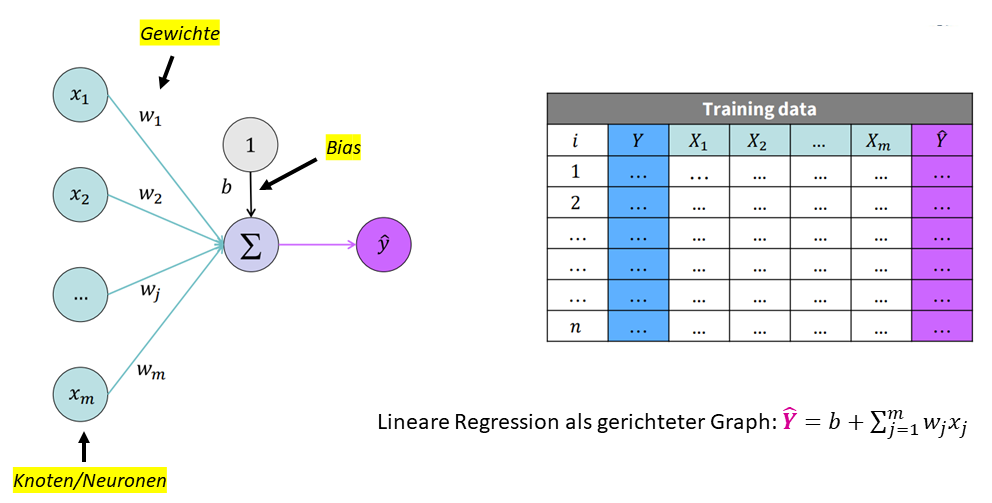

**Generalisiertes lineares Modell als Graph**:

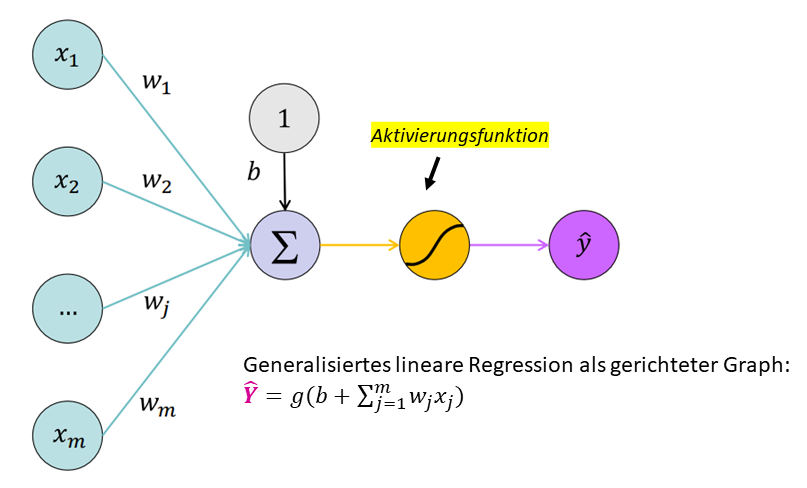

**Aktivierungsfunktionen:**

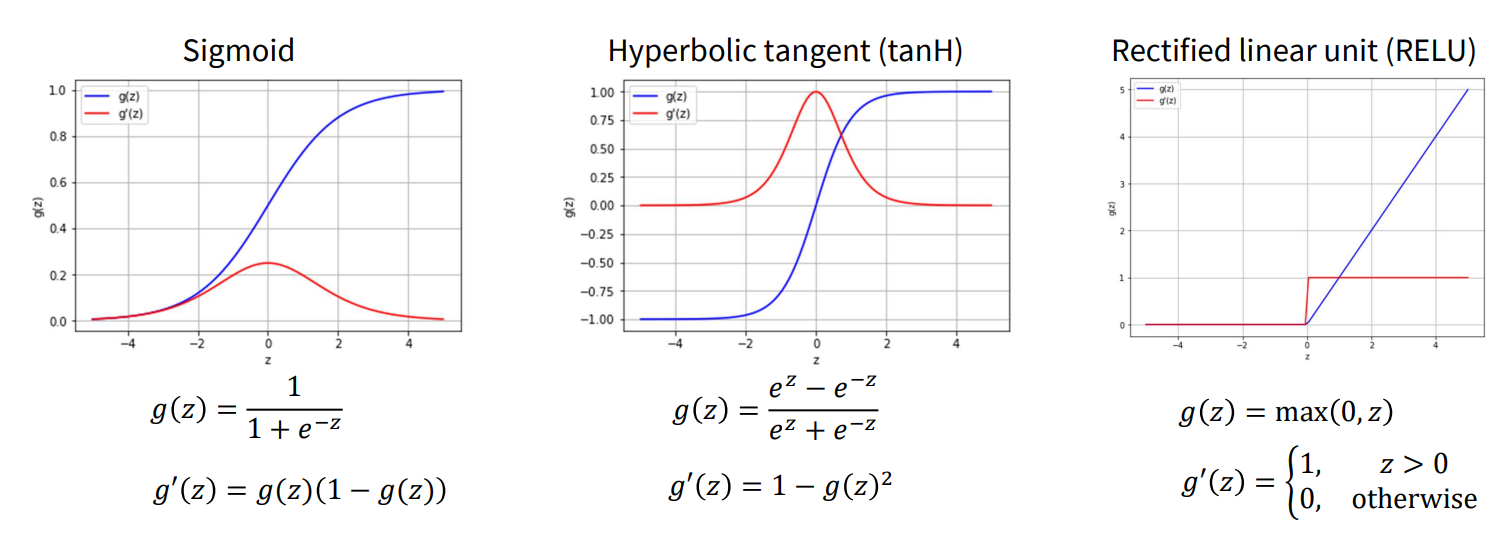

**Mehrere Hidden Layer**:

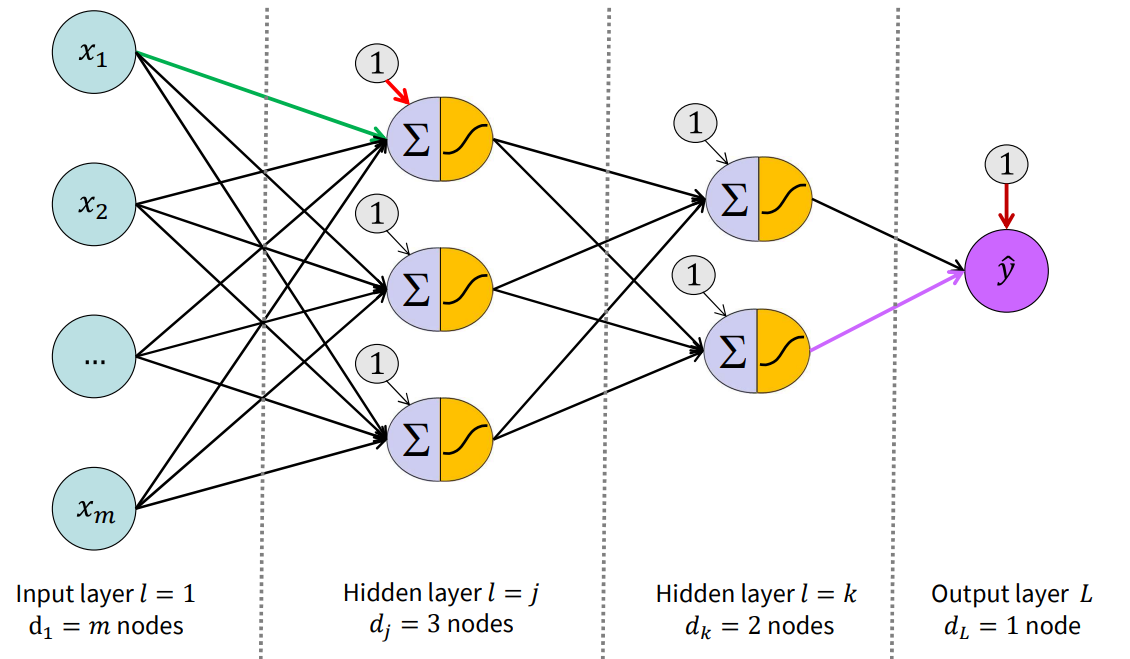

In [ ]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
print("Anzahl an Features: ", X.shape[1])
print("Anzahl an Beobachtungen: ", X.shape[0])
X_train, X_test, y_train, y_test = train_test_split(X, y) # Train Test Split

**NN mithilfe von scitkit-learn (Regression)**

Hier stellen wir nur den Seed des Zufallszahlengenerators ein. Dies sollte eine identische Gewichtsinitialisierung beim erneuten Ausführen des Codes gewährleisten. Werfen Sie einen Blick in die Dokumentation, um die vielen Meta-Parameter zu sehen, die Sie setzen können.

In [ ]:
from sklearn.neural_network import MLPRegressor
help(MLPRegressor)

In [ ]:
nn = MLPRegressor(random_state=1234, hidden_layer_sizes=(5,2), solver='lbfgs', alpha=1e-1) # 1. Modellspezifikation

NNs reagieren im Allgemeinen empfindlicher auf die Einstellung von Meta-Parametern als z. B. Random Forest. Wir werden im nächsten Kapitel skizzieren, wie wir das tuning Problem mit Hilfe des Grid Search angehen könnten.

In [ ]:
#---------------------------------------
# Beachten Sie, dass das Training des NN auf diesem Datensatz dazu führen kann, dass sklearn einige Warnmeldungen ausgibt, dass das Training nicht konvergiert hat. 
# Wir wollen uns damit nicht "herumschlagen" und filtern die Warnmeldungen einfach mit diesem Code
#---------------------------------------
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
#---------------------------------------

In [ ]:
nn.fit(X_train, y_train) # 2. Training

In [ ]:
y_pred = nn.predict(X_test) # 3. Prediction und Ergebnisse
print("Out-Of-Sample MSE: ", metrics.mean_squared_error(y_test, y_pred))

### 4.2 Neuronale Netze für Klassifikationen

**Binäre Klassifikation**

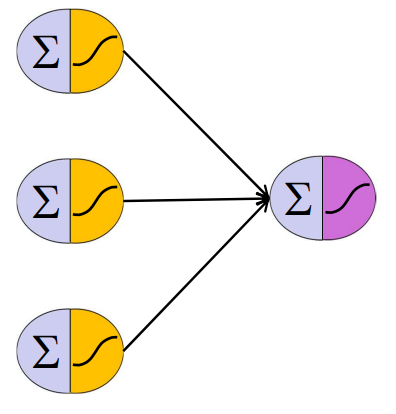

* Output-Layer mit einem Knoten, das die Eintrittswahrscheinlichkeit für eine der beiden Klassen modelliert
* "Aktivierungs"funktion: Sigmoid, um zu garantieren, dass $\hat{y} \in [0,1]$
* Training: log-loss Funktion

**Multiclass Klassifikation**

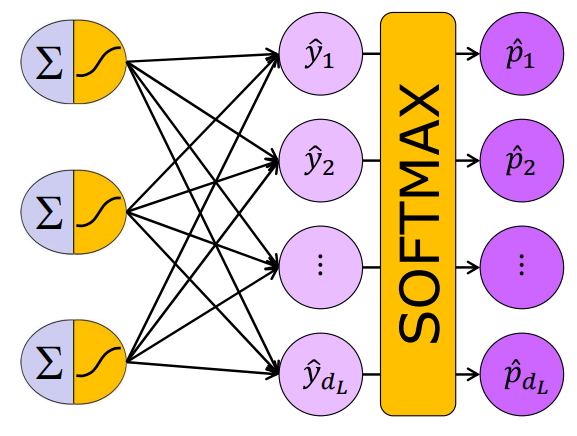

* $d_L$ Klassen, die sich nicht (!) überschneiden
* Output-Layer mit $d_L$ Knoten, welche die Eintrittswahrscheinlichkeit für die Klassen modelliert, also $\sum_{i = 1}^{d_L} \hat{y}_i = 1$
* "Aktivierungs"funktion: Softmax: $s(\hat{y}_j) = \frac{e^{\hat{y}_j}}{\sum_{i = 1}^{d_L} e^{z_k}}$

#### NN mithilfe von scikit-learn (Multiclass)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris() # mehr Infos zum Iris-Datensatz siehe Lösung Übung 6
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=1234)

In [ ]:
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1234) # 1. Modellspezifikation
nn.fit(X_train, y_train) # 2. Training
y_pred = nn.predict(X_test) # 3. Prediction und Ergebnisse
print("OS Accuracy: ", metrics.accuracy_score(y_test, y_pred))

**NN mithilfe von keras**

[Keras](https://keras.io/) ist eine High-Level-Bibliothek für Deep Learning. Im Vergleich zum Aufbau eines NN in Scikit-Learn ist Keras viel flexibler und etwas komplizierter. Als Faustregel gilt: Wenn Sie sich mit Deep Learning beschäftigen wollen, ist Keras ein guter Ausgangspunkt. <br>
Da Keras eine High-Level-API ist, benötigen wir Partner-Tool, das die eigentlichen Berechnungen durchführt. Keras unterstützt mehrere Alternativen, aber die 'einfachste' Wahl ist wahrscheinlich [Tensorflow](https://www.tensorflow.org/) von Google. Tensorflow und andere beliebte Frameworks wie [PyTorch](https://pytorch.org/) oder [MXNet](https://mxnet.apache.org/), um nur einige zu nennen, bieten mehr Flexibilität als Keras, was allerdings den Preis hat, dass diese Tools etwas schwieriger zu beherrschen sind. Wenn Sie daran interessiert sind, etwas mehr über die verschiedenen Optionen zu erfahren, ist [dieser Beitrag](https://towardsdatascience.com/top-10-best-deep-learning-frameworks-in-2019-5ccb90ea6de) ein guter Ausgangspunkt.

In [ ]:
# Import Keras
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Binärer Datensatz
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=1234)

In [ ]:
print("Anzahl an unabhängigen Variablen: ", X.shape[1])
print("Anzahl an Beobachtungen: ", X.shape[0])
print("Anzahl an Ausprägungen der Zielvariablen: ", set(y))
print("Prior Probability der Ausprägung 1: ", class_ratio(y_train))

In [ ]:
# Daten standardisieren
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

#### 1. Modellspezifikation

Keras bietet uns zwei "Stile" für die Einrichtung der Struktur Ihres Netzwerks an, die als sequenzielle und funktionale API (https://keras.io/models/about-keras-mod) bezeichnet werden. In den meisten Fällen ist es eine Frage der Präferenz, wir bleiben bei **sequential**. Das bedeutet, dass die Schichten sequentiell nacheinander aufgebaut werden.

In [ ]:
# Name des Modells und der Modelltyp festlegen
model = keras.Sequential()

Zunächst definieren wir die Anzahl an Knoten/Neuronen innerhalb der hidden layer und in dem Output layer. Die Anzahl der Neuronen der Output-Layer ist 1 bei Regressionen und binären Klassifikationen. Bei Multiclass-Klassifikationen entspricht die Anzahl der Output-Neuronen der Anzahl an Klassen.

In [ ]:
# Anzahl an hidden Neuronen
nb_units = 15 # willkürlich festgelegt

# Anzahl an Output layer Neuronen
nb_out = 1 # 1 für binäre Klassifikation

Jetzt beginnen wir mit dem Hinzufügen der Layers. Das geschieht eins nach dem anderen. <br>
Schauen Sie sich die Dokumentation der Dense Layer an, um mehr über die vielen verfügbaren Optionen zum Einrichten der Layer zu erfahren.<br>
Da dies unser erstes Layer ist, müssen wir die Dimension der Input-Variablen angeben.<br>

In [ ]:
help(layers.Dense)

In [ ]:
model.add(layers.Dense(units=nb_units, activation='tanh', input_shape=(X_train.shape[1],), name="1_hidden_layer")) # 1. Layer

In [ ]:
model.add(layers.Dense(units=nb_units, activation='relu', name="2_hidden_layer")) # 2. Layer

In [ ]:
model.add(layers.Dense(units=nb_out, activation='sigmoid', name="output_layer")) # Output Layer

In [ ]:
model.summary()

In [ ]:
# Anzahl der Parameter gegenprüfen
# Input zu Hidden Layer: 75 Parameter
print(X.shape[1] * nb_units + nb_units) # Anzahl an Gewichten + Bias für jedes Hidden Neuron

# Erstes Hidden layer zu zweitem Hidden Layer
print(nb_units * nb_units + nb_units)

# Zweites Hidden Layer zu Output Layer
print(nb_units * nb_out + nb_out)

#### 2. Training des Netzwerks

Die meisten Parameter, die den Trainingsprozess bestimmen, werden mit den Methoden `compile` und `fit` festgelegt.<br>

Die Strategie der Parameteroptimierung ist eine der wichtigsten Entscheidungen für das Training des neuronalen Netzes. Eine davon ist der stochastischen Gradientenabstieg (stochastic gradient descent), der als grundlegend gilt. Oft kann eine bessere Leistung durch die Verwendung von Optimizer wie **Rmsprop, Adagrad, Adam** usw. erzielt werden.

Die **Learning rate** wird im Optimierer festgelegt, muss aber nicht während des gesamten Trainings gleich bleiben. Fortgeschrittene Optimizer (z.B. AdaGrad, Adam) können sie automatisch während der Suche anpassen.

In [ ]:
opt = keras.optimizers.SGD(learning_rate=0.001) # stochastic gradient descent

Die Verlustfunktion (**loss function**) wird durch die Aufgabe definiert:
* Binary Crossentropy bei binärer Klassifikation
* MSE bei Regressionen 
* Categorical Crossentropy bei Multiclass Klassifikation
* ...

In [ ]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

Ein **Batch** ist ein "Datenpaket", das in den Optimizer eingespeist wird. Größere Batch sizes führen zu einem schnelleren Fortschritt beim Training, konvergieren aber nicht immer so schnell. Kleinere Batch size aktualisieren die Gewichte langsamer, führen aber zu einer stabileren Konvergenz. 
Die Batch size bestimmt, wie viele Beobachtungen wir betrachten, bevor wir unsere Gewichte updaten. Je weniger Beobachtungen wir uns ansehen, desto noisier wird das Trainingssignal sein. Je mehr Beobachtungen wir uns ansehen, desto länger wird die Berechnung des Gradienten für jeden Schritt dauern.

**Epochen** ist die Anzahl der Runden, die der Algorithmus durch den gesamten Datensatz geht. In der Regel sind die Ergebnisse umso besser, je mehr Trainingsepochen durchgeführt werden. Bei zu vielen Epochen, beginnt das Netz zu overfitten.

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=1, 
                    validation_split=0.3
                 ) 

In [ ]:
# Visualization
def show_history(story):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(13.5, 5.5)
    ax1.plot(story.history['accuracy'])
    ax1.plot(story.history['val_accuracy'])
    ax1.set(xlabel='epoch', ylabel='accuracy')
    ax1.legend(['train_accuracy', 'test_accuracy'], loc='best')
    ax1.set_title('Accuracy evolution during NN training')
    
    ax2.plot(story.history['loss'])
    ax2.plot(story.history['val_loss'])
    ax2.set(xlabel='epoch', ylabel='loss')
    ax2.legend(['train_loss', 'test_loss'], loc='best')
    ax2.set_title('Loss evolution during NN training')
    plt.show()

show_history(history)

<div class="alert alert-warning"><h4> Aufgabe 2: Keras

In dieser Aufgabe spezifizieren und trainieren wir ein Neuronales Netz für den HMEQ Datensatz.

a) Instanziieren Sie das sequenzielle Neuronales Netz **nn**.

b) Legen Sie nun die Netzwerkarchitektur fest, in dem Sie nacheinander die Layer hinzufügen:
* Ein Dense Layer mit 10 Knoten und einer tanH Aktivierungsfunktion (Denken Sie an `input_shape`)
* Ein Dense Layer mit 5 Knoten und einer RELU Aktivierungsfunktion
* Ein Output Layer (Dense Layer) mit einem Knoten und einer sigmoid Aktivierungsfunktion

c) Geben Sie die *summary* des Modells aus.

d) Verwenden Sie `keras.optimizers.SGD` als Optimizer mit einer Lernrate von 0.01 und weisen Sie das dem Objekt `opt` zu.

e) Kompilieren Sie Ihr Modell (`nn.compile()`). Verwenden Sie hierfür den in Aufgabe e) instanziierten Optimizers, eine binary crossentropy und als Metrik die Accuracy.

f) Trainieren Sie nun Ihr Modell mit Ihrem in Aufgabe 1 erstellten Testdatensatz. Dabei soll die Anzahl an Epochen gleich 10 und der validation_split gleich 0.2 sein.

**Achtung**: Aktuell ist unser Datensatz als pandas Dataframe gespeichert. Bevor Sie die Teilaufgabe lösen, müssen Sie zunächst den Trainings- und Testdatensatz als numpy array mit dem Datentyp float abspeichern.<br>
Die Target-Variable muss ebenfalls als numpy array vorliegen.

g) Was gibt Ihnen der nachfolgende Python-Code aus?

In [ ]:
score = nn.evaluate(X_test, y_test, verbose=0)

h) Lassen Sie sich mithilfe der in der Vorlesung definierten Funktion `show_history()` die Modellperformance ausgeben.

## 5 Modellauswahl

Bei vielen Modellen müssen wir *Hyperparameter* setzen. Beispielsweise die maximale Tiefe eines Klassifikationsbaums mit Hilfe von `max_depth`. Diese Hyperparameter müssen festgelegt werden (ähnlich der Merkmalsauswahl in Regressionsmodellen). \
Wie trifft man die Auswahl der Hyperparameter?
* Default-Setting (keine gute Idee!)
* Aus Erfahrung heraus (kann funktionieren)
* Empirisch, im Rahmen des Modellauswahlprozesses (gängige Praxis) 


**Grid Search** \
Vollständige Suche durch alle möglichen Kombinationen von Kandidaten für die Hyperparameter-Einstellungen. \
Achtung: Es werden *neue* Daten benötigt, um Kandidatenmodelle mit verschiedenen Hyperparametern zu bewerten: Ein Validation-Datensatz \
Vorgehen: 
1. Definieren eines Kandidatenbereichs für jeden Hyperparameter 
2. Modell mit einer Kombination von Hyperparametern mit dem Testdatensatz trainieren 
3. Bewertung der Modellleistung anhand des Validation-Datensatzes
4. Wiederholung mit der nächsten Kombination von Hyperparametern
5. ...
6. Identifikation der besten Hyperparameter-Kombination
7. Trainieren eines Modells mit der besten Hyperparameter-Kombination mit dem Test- und dem Validierungsdatensatz
8. Prognosegüten mithilfe des Testdatensatzes

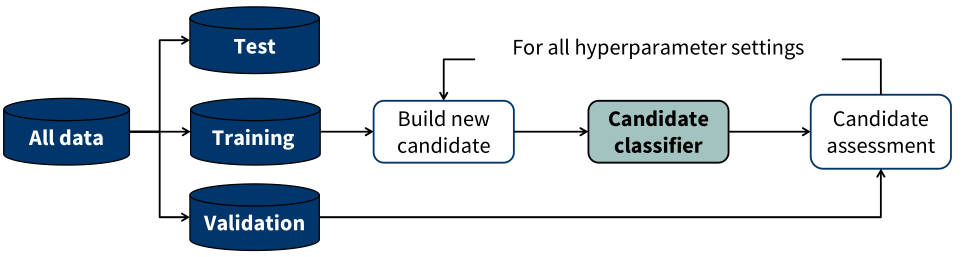

In [ ]:
from sklearn.model_selection import GridSearchCV, ParameterGrid

In [ ]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=1234)

**1. Definieren eines Kandidatenbereich für jeden Hyperparameter**

In [ ]:
help(RandomForestClassifier)

In [ ]:
params = {"n_estimators": [70, 100],
          "max_depth": [1, 10],
          "min_samples_leaf": [2, 50]} 

In [ ]:
list(ParameterGrid(params))

In [ ]:
print("Anzahl an Kombinationen: ", len(list(ParameterGrid(params))))


**2. Modell mit den Hyperparameter-Kombinationen trainieren**

In [ ]:
rf = RandomForestClassifier(random_state=0)

In [ ]:
gs_rf = GridSearchCV(estimator=rf, param_grid=params, scoring='accuracy', cv=3, verbose=2)

In [ ]:
gs_rf.fit(X_train, y_train)
print(gs_rf.best_params_)

In [ ]:
# Ergebnisse
gs_results = pd.DataFrame(gs_rf.cv_results_)
gs_results[["param_n_estimators", "param_max_depth",
          "param_min_samples_leaf", "mean_test_score", "std_test_score","rank_test_score"]]

In [ ]:
y_pred = gs_rf.predict(X_test)
print('OS Accuracy: ', metrics.accuracy_score(y_pred, y_test))